In [1]:
import mj_envs
import gym
import skvideo.io
import numpy as np
import os

RS:> Registering Hand Envs
RS:> Registering Biomechanics Envs


In [2]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 400):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video autoplay width={video_width} controls><source src="{video_url}"></video>""")



### From https://www.nature.com/articles/s41597-019-0349-2.pdf

In [3]:
# # !wget http://ninapro.hevs.ch/system/files/CalibratedKinematicData/s_4_angles.zip
# # !unzip s_4_angles.zip
# !ls s_4_angles
# !ls Subject_1/
!ls s_1_angles


S1_E1_A1.mat S1_E2_A1.mat S1_E3_A1.mat desktop.ini


In [4]:
import scipy.io
import matplotlib.pyplot as plt
# mat_fn='./s_1_angles/S1_E2_A1.mat'
mat_fn='./s_4_angles/S4_E2_A1.mat'
# # mat_fn='./Subject_1/S1_E1_A1.mat'
mat = scipy.io.loadmat(mat_fn)
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'angles', 'exercise', 'glove', 'order_of_angles', 'rerepetition', 'restimulus', 'subject'])

In [12]:
# print(mat.keys())
data_angles_names = [s[0] for s in mat['order_of_angles'][0]]
data_angles_names


['1:CMC1_f',
 '2:CMC1_a',
 '3:MCP1',
 '4:IP1',
 '5:MCP2_f',
 '6:MCP2_a',
 '7:PIP2',
 '8:MCP3_f',
 '9:PIP3',
 '10:MCP4_f',
 '11:MCP4_a',
 '12:PIP4',
 '13:CMC5',
 '14:MCP5_f',
 '15:MCP5_a',
 '16:PIP5',
 '17:DIP2',
 '18:DIP3',
 '19:DIP4',
 '20:DIP5',
 '21:WRIST_F',
 '22:WRIST_A']

In [99]:
# mat['glove'].shape
print(env.sim.model.joint_names)

('pro_sup', 'deviation', 'flexion', 'cmc_abduction', 'cmc_flexion', 'mp_flexion', 'ip_flexion', 'mcp2_flexion', 'mcp2_abduction', 'pm2_flexion', 'md2_flexion', 'mcp3_flexion', 'mcp3_abduction', 'pm3_flexion', 'md3_flexion', 'mcp4_flexion', 'mcp4_abduction', 'pm4_flexion', 'md4_flexion', 'mcp5_flexion', 'mcp5_abduction', 'pm5_flexion', 'md5_flexion')


In [7]:
# # https://www.researchgate.net/publication/272818594_Decoding_of_human_hand_actions_to_handle_missing_limbs_in_Neuroprosthetics/figures?lo=1
# print('joint space ',env.sim.data.qpos.shape)
# print('joint names ',len(env.sim.model.joint_names))
# print(env.sim.model.joint_names)

dict_corr={
     '1:CMC1_f':('cmc_flexion',1),
     '2:CMC1_a':('cmc_abduction',1),
     '3:MCP1':('mp_flexion',1),
     '4:IP1':('ip_flexion',1),
     '5:MCP2_f':('mcp2_flexion',1),
     '6:MCP2_a':('mcp2_abduction',1),
     '7:PIP2':('pm2_flexion',1),
     '8:MCP3_f':('mcp3_flexion',1),
     '9:PIP3':('pm3_flexion',1),
     '10:MCP4_f':('mcp4_flexion',1),
     '11:MCP4_a':('mcp4_abduction',1),
     '12:PIP4':('pm4_flexion',1),
     '13:CMC5':None,
     '14:MCP5_f':('mcp5_flexion',1),
     '15:MCP5_a':('mcp5_abduction',1),
     '16:PIP5':('pm5_flexion',1),
     '17:DIP2':('md2_flexion',1),
     '18:DIP3':('md3_flexion',-1),
     '19:DIP4':('md4_flexion',-1),
     '20:DIP5':('md5_flexion',-1),
     '21:WRIST_F':('flexion',1),
     '22:WRIST_A':('deviation',1)}

In [8]:
# for jointData in dict_corr.keys():
#     if dict_corr[jointData]:
#         jointMJC = dict_corr[jointData]
#         iposMJC = env.sim.model.joint_names.index(jointMJC)
#         a = np.deg2rad(mat_angles[t,data_angles_names.index(jointData)]);
#         if np.isnan(a): a = 0


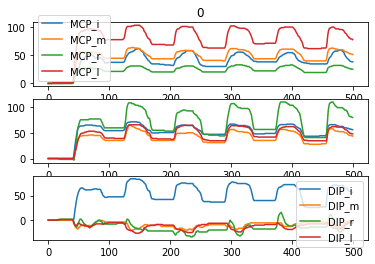

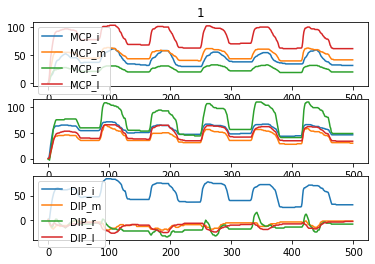

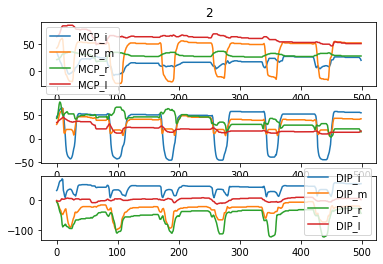

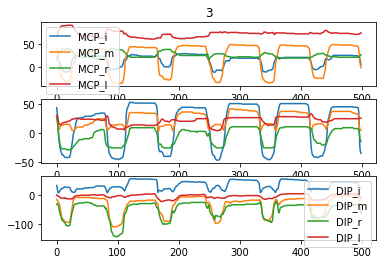

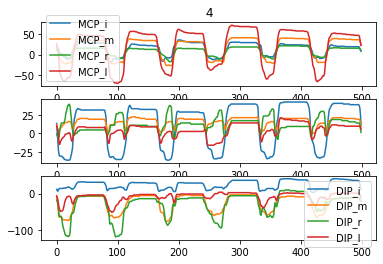

In [28]:
# Sampling frequency
# DB1 - 100 Hz, 
# DB2 - 2 kHz,
# DB3 - 200 Hz

## downsampling cybergloves data
stim = mat['restimulus'][::2,:]
mat_angles = mat['angles'][::2,:]
 
# # # # print(dict_corr.keys())
# # # plt.figure(figsize=(10,10))
# # # # plt.subplot(411),plt.plot(mat_angles[:100,[4,6,16]]), plt.title('index')
# # # # plt.subplot(412),plt.plot(mat_angles[:100,[7,8,17]]), plt.title('middle')
# # # # plt.subplot(413),plt.plot(mat_angles[:100,[9,11,18]]), plt.title('ring')
# # # plt.subplot(414),plt.plot(mat_angles[:100,[13,15,19]]), plt.title('little')
# # # plt.legend(['MCP','PIP','DIP'])

mat_angles.shape
mat_angles_cent=np.zeros(mat_angles.shape)
for i in range(mat_angles.shape[1]):
    mat_angles_cent[:,i]=mat_angles[:,i]-np.median(mat_angles[:10,i])
re_stim = 1
for re_stim in np.unique(stim)[0:5]:
    plt.figure()
    plt.subplot(311)
    c=mat_angles_cent[np.min(np.where(stim==re_stim)[0]):np.min(np.where(stim==re_stim)[0])+500,[4,7,9,13]]
    plt.plot(c), plt.title(str(re_stim))
    plt.legend(['MCP_i','MCP_m','MCP_r','MCP_l'])
    plt.subplot(312)
    c=mat_angles_cent[np.min(np.where(stim==re_stim)[0]):np.min(np.where(stim==re_stim)[0])+500,[6,8,11,15]]
    plt.plot(c)
#     plt.legend(['PIP_i','PIP_m','PIP_r','PIP_l'])
    plt.subplot(313)
    c=mat_angles_cent[np.min(np.where(stim==re_stim)[0]):np.min(np.where(stim==re_stim)[0])+500,[16,17,18,19]]
    plt.plot(c)
    plt.legend(['DIP_i','DIP_m','DIP_r','DIP_l'])


In [24]:
env = gym.make('HandPoseMuscleRandom-v0')
print('mjc sampling rate: {}'.format(1./env.env.dt))
print('List of cameras available',env.sim.model.camera_names)
env.reset()

for re_stim in np.unique(stim)[2:4]:#[0:1]:#[1:3]:
    print('Condition {} of {}'.format(re_stim,len(np.unique(stim))))
    frames = []
    for t in np.arange(np.min(np.where(stim==re_stim)[0]), np.max(np.where(stim==re_stim)[0])):
#     for t in np.arange(0,2000):
        frame1 = env.sim.render(width=400, height=400,mode='offscreen', camera_name='hand_bottom')
        frame2 = env.sim.render(width=400, height=400,mode='offscreen', camera_name='hand_side_inter')
        frame3 = env.sim.render(width=400, height=400,mode='offscreen', camera_name='hand_side_exter')
        frame4 = env.sim.render(width=400, height=400,mode='offscreen', camera_name='hand_top')
        frames.append(np.concatenate((frame1[::-1,:,:],frame2[::-1,:,:],frame3[::-1,:,:],frame4[::-1,:,:]),1))
        for i in range(len(env.sim.data.qpos)):
            env.sim.data.qpos[i] = 0
        for jointData in dict_corr.keys():
            if dict_corr[jointData]:
                jointMJC = dict_corr[jointData][0]
                iposMJC = env.sim.model.joint_names.index(jointMJC)
                a = dict_corr[jointData][1]*np.deg2rad(mat_angles_cent[t,data_angles_names.index(jointData)]);
                if np.isnan(a): a = 0
                env.sim.data.qpos[iposMJC] = a
        env.sim.forward()
        env.sim.step()        
    os.makedirs('videos', exist_ok=True)
    # make a local copy
    skvideo.io.vwrite('videos/no_cent_'+mat_fn[2:-4].replace('/','__')+'_stim_'+str(re_stim)+'.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})
# show_video('videos/temp.mp4')

List of cameras available ('hand_top', 'hand_bottom', 'hand_side_inter', 'hand_side_exter', 'plam_lookat')
Condition 1 of 18
Creating offscreen glfw


In [11]:
show_video('videos/temp.mp4')

FileNotFoundError: [Errno 2] No such file or directory: 'videos/temp.mp4'

In [ ]:
# for jointData in ['6:MCP2_a']:#dict_corr.keys():
#     plt.plot(mat['angles'][:,data_angles_names.index(jointData)],label=jointData)
# plt.legend()
mat['angles'][:,data_angles_names.index(jointData)]

In [ ]:
data_angles_names#.index(jointMJC)

In [ ]:
jointMJC

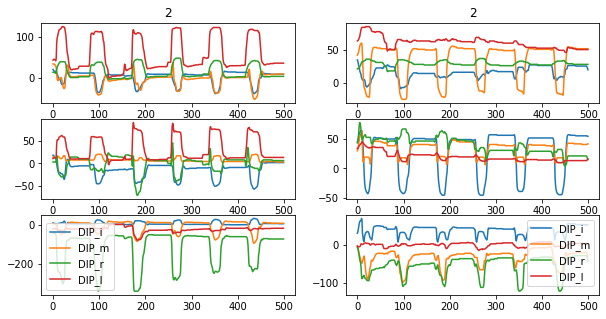

In [80]:
mat_fn='./s_1_angles/S1_E2_A1.mat'
mat1 = scipy.io.loadmat(mat_fn)
mat_fn='./s_4_angles/S4_E2_A1.mat'
mat2 = scipy.io.loadmat(mat_fn)

stim1 = mat1['restimulus'][::10,:]
mat_angles1 = mat1['angles'][::10,:]

stim2 = mat2['restimulus'][::10,:]
mat_angles2 = mat2['angles'][::10,:]

mat_angles_cent1=np.zeros(mat_angles1.shape)
mat_angles_cent2=np.zeros(mat_angles2.shape)

for i in range(mat_angles.shape[1]):
    mat_angles_cent1[:,i]=mat_angles1[:,i]-np.median(mat_angles1[:50,i])
    mat_angles_cent2[:,i]=mat_angles2[:,i]-np.median(mat_angles2[:50,i])
#     mat_angles_cent1[:,i]=mat_angles1[:,i]
#     mat_angles_cent2[:,i]=mat_angles2[:,i]

for re_stim in np.unique(stim)[2:3]:
    plt.figure(figsize=(10,5))
    plt.subplot(321)
    c=mat_angles_cent1[np.min(np.where(stim1==re_stim)[0]):np.min(np.where(stim1==re_stim)[0])+500,[4,7,9,13]]
    plt.plot(c), plt.title(str(re_stim))
#     plt.legend(['MCP_i','MCP_m','MCP_r','MCP_l'])
    plt.subplot(323)
    c=mat_angles_cent1[np.min(np.where(stim1==re_stim)[0]):np.min(np.where(stim1==re_stim)[0])+500,[6,8,11,15]]
    plt.plot(c)
#     plt.legend(['PIP_i','PIP_m','PIP_r','PIP_l'])
    plt.subplot(325)
    c=mat_angles_cent1[np.min(np.where(stim1==re_stim)[0]):np.min(np.where(stim1==re_stim)[0])+500,[16,17,18,19]]
    plt.plot(c)
    plt.legend(['DIP_i','DIP_m','DIP_r','DIP_l'])

    plt.subplot(322)
    c=mat_angles_cent2[np.min(np.where(stim2==re_stim)[0]):np.min(np.where(stim2==re_stim)[0])+500,[4,7,9,13]]
    plt.plot(c), plt.title(str(re_stim))
#     plt.legend(['MCP_i','MCP_m','MCP_r','MCP_l'])
    plt.subplot(324)
    c=mat_angles_cent2[np.min(np.where(stim2==re_stim)[0]):np.min(np.where(stim2==re_stim)[0])+500,[6,8,11,15]]
    plt.plot(c)
#     plt.legend(['PIP_i','PIP_m','PIP_r','PIP_l'])
    plt.subplot(326)
    c=mat_angles_cent2[np.min(np.where(stim2==re_stim)[0]):np.min(np.where(stim2==re_stim)[0])+500,[16,17,18,19]]
    plt.plot(c)
    plt.legend(['DIP_i','DIP_m','DIP_r','DIP_l'])


In [58]:
mat1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'angles', 'exercise', 'glove', 'order_of_angles', 'rerepetition', 'restimulus', 'subject'])

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x7fded2da5588>])

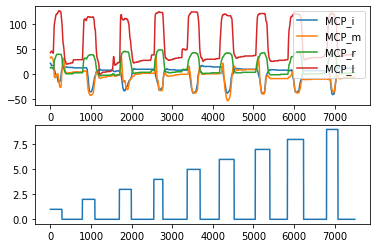

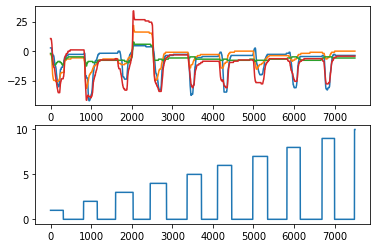

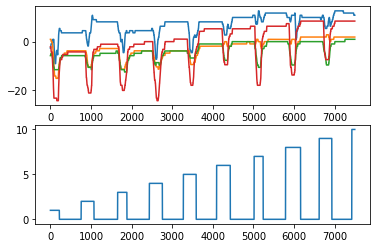

In [78]:
plt.figure()
re_stim=2
c=mat_angles_cent1[np.min(np.where(stim1==re_stim)[0]):np.min(np.where(stim1==re_stim)[0])+7500,[4,7,9,13]]
a=mat1['rerepetition'][np.min(np.where(stim1==re_stim)[0]):np.min(np.where(stim1==re_stim)[0])+7500]
plt.subplot(211),plt.plot(c), plt.legend(['MCP_i','MCP_m','MCP_r','MCP_l'])
plt.subplot(212),plt.plot(a)


plt.figure()
re_stim=9
c=mat_angles_cent1[np.min(np.where(stim1==re_stim)[0]):np.min(np.where(stim1==re_stim)[0])+7500,[4,7,9,13]]
a=mat1['rerepetition'][np.min(np.where(stim1==re_stim)[0]):np.min(np.where(stim1==re_stim)[0])+7500]
plt.subplot(211),plt.plot(c)
plt.subplot(212),plt.plot(a)

plt.figure()
re_stim=10
c=mat_angles_cent1[np.min(np.where(stim1==re_stim)[0]):np.min(np.where(stim1==re_stim)[0])+7500,[4,7,9,13]]
a=mat1['rerepetition'][np.min(np.where(stim1==re_stim)[0]):np.min(np.where(stim1==re_stim)[0])+7500]
plt.subplot(211),plt.plot(c)
plt.subplot(212),plt.plot(a)

In [90]:
import pandas as pd

In [97]:
df=pd.read_csv('Sign_Language_O_Kinematics.csv')
df.columns

Index(['time', 'deviation', 'flexion', 'cmc_flexion', 'cmc_abduction',
       'mp_flexion', 'ip_flexion', '4cmc_flexion', '2mcp_abduction',
       '2mcp_flexion', '2pm_flexion', '2md_flexion', '3mcp_abduction',
       '3mcp_flexion', '3pm_flexion', '3md_flexion', '4mcp_abduction',
       '4mcp_flexion', '4pm_flexion', '4md_flexion', '5mcp_abduction',
       '5mcp_flexion', '5pm_flexion', '5md_flexion'],
      dtype='object')


In [118]:
dict_corr={'deviation':'deviation', 
'flexion':'flexion', 
'cmc_flexion':'cmc_flexion', 
'cmc_abduction':'cmc_abduction',
'mp_flexion':'mp_flexion', 
'ip_flexion':'ip_flexion', 
'4cmc_flexion': None,
'2mcp_abduction':'mcp2_abduction',
'2mcp_flexion':'mcp2_flexion', 
'2pm_flexion':'pm2_flexion', 
'2md_flexion':'md2_flexion', 
'3mcp_abduction':'mcp3_abduction',
'3mcp_flexion':'mcp3_flexion', 
'3pm_flexion':'pm3_flexion', 
'3md_flexion':'md3_flexion',
'4mcp_abduction':'mcp4_abduction',
'4mcp_flexion':'mcp4_flexion', 
'4pm_flexion':'pm4_flexion', 
'4md_flexion':'md4_flexion', 
'5mcp_abduction':'mcp5_abduction',
'5mcp_flexion':'mcp5_flexion', 
'5pm_flexion':'pm5_flexion',  
'5md_flexion':'md5_flexion',
    }

env = gym.make('HandPoseMuscleRandom-v0')
print('mjc sampling rate: {}'.format(1./env.env.dt))
print('List of cameras available',env.sim.model.camera_names)
env.reset()

frames = []
for t in range(1000):
#     for t in np.arange(0,2000):
    frame1 = env.sim.render(width=400, height=400,mode='offscreen', camera_name='hand_bottom')
    frame2 = env.sim.render(width=400, height=400,mode='offscreen', camera_name='hand_side_inter')
    frame3 = env.sim.render(width=400, height=400,mode='offscreen', camera_name='hand_side_exter')
    frame4 = env.sim.render(width=400, height=400,mode='offscreen', camera_name='hand_top')
    frames.append(np.concatenate((frame1[::-1,:,:],frame2[::-1,:,:],frame3[::-1,:,:],frame4[::-1,:,:]),1))
    for i in range(len(env.sim.data.qpos)):
        env.sim.data.qpos[i] = 0
    for jointData in dict_corr.keys():
        if dict_corr[jointData]:
            jointMJC = dict_corr[jointData]
            iposMJC = env.sim.model.joint_names.index(jointMJC)
            a = np.deg2rad(df[jointData].values[t]);
            if np.isnan(a): a = 0
            env.sim.data.qpos[iposMJC] = a
    env.sim.forward()
    env.sim.step()        
os.makedirs('videos', exist_ok=True)
# make a local copy
skvideo.io.vwrite('videos/tempOsim.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})
show_video('videos/tempOsim.mp4')

mjc sampling rate: 50.0
List of cameras available ('hand_top', 'hand_bottom', 'hand_side_inter', 'hand_side_exter', 'plam_lookat')
Creating offscreen glfw


IndexError: index 450 is out of bounds for axis 0 with size 450

In [119]:
skvideo.io.vwrite('videos/tempOsim.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})
show_video('videos/tempOsim.mp4')

In [105]:
jointData

'deviation'

In [120]:
!pip install bvh

  Created wheel for bvh: filename=bvh-0.3-py3-none-any.whl size=2523 sha256=4cf80cb134d876f60c975753044761681ea44e964687b7f3eb8c093430cbddb3
  Stored in directory: /Users/caggiano/Library/Caches/pip/wheels/36/45/10/c16b0cca3db095d877ec36970ef2fb28f079279bf1d70e0208
Successfully built bvh


In [121]:
import bvh

ModuleNotFoundError: No module named 'bvh'

In [123]:
import matplotlib.pyplot as plt
from bvh import Bvh

with open('take1_hasFingers_deep2_scale_local.bvh') as f:
    mocap = Bvh(f.read())
print(mocap.get_joints_names())
# plt.plot(mocap.frames_joint_channels('b_l_ring1', ['Xrotation','Yrotation', 'Zrotation']))
# plt.plot(mocap.frames_joint_channels('b_l_ring2', ['Xrotation','Yrotation', 'Zrotation']))
# plt.plot(mocap.frames_joint_channels('b_l_ring3', ['Xrotation','Yrotation', 'Zrotation']))
# plt.figure(),
# plt.plot(mocap.frames_joint_channels('b_l_ring1', ['Xrotation','Yrotation', 'Zrotation'])),plt.show(block=False)

['b_r_arm', 'b_r_arm_twist', 'b_r_forearm', 'b_r_wrist_twist', 'b_r_wrist', 
 'b_r_index1', 'b_r_index2', 'b_r_index3', 
 'b_r_ring1', 'b_r_ring2', 'b_r_ring3', 
 'b_r_middle1', 'b_r_middle2', 'b_r_middle3', 
 'b_r_pinky1', 'b_r_pinky2', 'b_r_pinky3', 
 'b_r_thumb0', 'b_r_thumb1', 'b_r_thumb2', 'b_r_thumb3']

dict_corr={'deviation':'deviation', 
'flexion':'flexion', 
'cmc_flexion':'cmc_flexion', 
'cmc_abduction':'cmc_abduction',
'mp_flexion':'mp_flexion', 
'ip_flexion':'ip_flexion', 
'4cmc_flexion': None,
'mcp2_abduction':('b_r_index1','Xrotation'),
'mcp2_flexion':('b_r_index1','Zrotation'),
'pm2_flexion':('b_r_index2','Zrotation'),
'md2_flexion':('b_r_index3','Zrotation'),
'mcp3_abduction':('b_r_middle1','Xrotation'),
'mcp3_flexion':('b_r_middle1','Zrotation'),
'pm3_flexion':('b_r_middle2','Zrotation'),
'md3_flexion':('b_r_middle3','Zrotation'),
'mcp4_abduction':('b_r_ring1','Xrotation'),
'mcp4_flexion':('b_r_ring1','Zrotation'),
'pm4_flexion':('b_r_ring2','Zrotation'),
'md4_flexion':('b_r_ring3','Zrotation'),
'mcp5_abduction':('b_r_pinky1','Xrotation'),
'mcp5_flexion':('b_r_pinky1','Zrotation'),
'pm5_flexion':('b_r_pinky2','Zrotation'),
'md5_flexion':('b_r_pinky3','Zrotation'),
    }

# env = gym.make('HandPoseMuscleRandom-v0')
# print('mjc sampling rate: {}'.format(1./env.env.dt))
# print('List of cameras available',env.sim.model.camera_names)
# env.reset()

# frames = []
# for t in range(1000):
# #     for t in np.arange(0,2000):
#     frame1 = env.sim.render(width=400, height=400,mode='offscreen', camera_name='hand_bottom')
#     frame2 = env.sim.render(width=400, height=400,mode='offscreen', camera_name='hand_side_inter')
#     frame3 = env.sim.render(width=400, height=400,mode='offscreen', camera_name='hand_side_exter')
#     frame4 = env.sim.render(width=400, height=400,mode='offscreen', camera_name='hand_top')
#     frames.append(np.concatenate((frame1[::-1,:,:],frame2[::-1,:,:],frame3[::-1,:,:],frame4[::-1,:,:]),1))
#     for i in range(len(env.sim.data.qpos)):
#         env.sim.data.qpos[i] = 0
#     for jointData in dict_corr.keys():
#         if dict_corr[jointData]:
#             jointMJC = dict_corr[jointData]
#             iposMJC = env.sim.model.joint_names.index(jointMJC)
#             a = np.deg2rad(df[jointData].values[t]);
#             if np.isnan(a): a = 0
#             env.sim.data.qpos[iposMJC] = a
#     env.sim.forward()
#     env.sim.step()        
# os.makedirs('videos', exist_ok=True)
# # make a local copy
# skvideo.io.vwrite('videos/tempOsim.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})
# show_video('videos/tempOsim.mp4')

ModuleNotFoundError: No module named 'bvh'